## Import Library

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

## Load Data

In [45]:
df = pd.read_csv('Data genset.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df

,state,description,oilPressure,coolantTemperature,engineRPM,engineVibration,batteryVoltageDC,gensetVoltageAC,gensetCurrentAC,gensetFrequencyAC,gensetPowerAC,fuelLevel,hoursMeter
timestamp,,,,,,,,,,,,,
2025-07-01 08:00:00,Normal,Normal Operation,3.62,30.00,1548.20,49,13.20,229.61,15.96,50.12,11381.65,80.00,1352.721
2025-07-01 08:00:05,Normal,Normal Operation,3.48,30.10,1620.23,68,13.03,222.94,14.09,50.01,12584.24,79.99,1352.723
2025-07-01 08:00:10,Normal,Normal Operation,3.55,30.20,1665.89,45,13.18,226.86,17.19,49.87,12167.44,79.99,1352.724
2025-07-01 08:00:15,Normal,Normal Operation,3.23,30.30,1636.71,52,12.94,226.79,14.11,50.00,11990.22,79.99,1352.726
2025-07-01 08:00:20,Normal,Normal Operation,3.66,30.40,1543.58,51,13.02,227.22,13.72,50.10,10710.56,79.98,1352.727
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-02 11:46:15,Normal,Normal Operation,3.53,78.43,1569.73,55,12.91,224.58,11.83,50.04,12780.27,10.01,1380.492
2025-07-02 11:46:20,Normal,Normal Operation,3.63,73.47,1646.43,44,12.75,222.35,14.66,49.70,12432.86,10.01,1380.494
2025-07-02 11:46:25,Normal,Normal Operation,3.68,75.80,1630.57,58,12.86,226.11,13.84,50.06,12513.26,10.01,1380.495


## Preprocessing Data

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2025-07-01 08:00:00 to 2025-07-02 11:46:35
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               20000 non-null  object 
 1   description         20000 non-null  object 
 2   oilPressure         20000 non-null  float64
 3   coolantTemperature  20000 non-null  float64
 4   engineRPM           20000 non-null  float64
 5   engineVibration     20000 non-null  int64  
 6   batteryVoltageDC    20000 non-null  float64
 7   gensetVoltageAC     20000 non-null  float64
 8   gensetCurrentAC     20000 non-null  float64
 9   gensetFrequencyAC   20000 non-null  float64
 10  gensetPowerAC       20000 non-null  float64
 11  fuelLevel           20000 non-null  float64
 12  hoursMeter          20000 non-null  float64
dtypes: float64(10), int64(1), object(2)
memory usage: 2.1+ MB


In [47]:
print("Nilai hilang:\n", df.isnull().sum())

Nilai hilang:
 state                 0
description           0
oilPressure           0
coolantTemperature    0
engineRPM             0
engineVibration       0
batteryVoltageDC      0
gensetVoltageAC       0
gensetCurrentAC       0
gensetFrequencyAC     0
gensetPowerAC         0
fuelLevel             0
hoursMeter            0
dtype: int64


In [48]:
# Encode target
le = LabelEncoder()
df['state_encoded'] = le.fit_transform(df['state'])

## Visualisasi Data

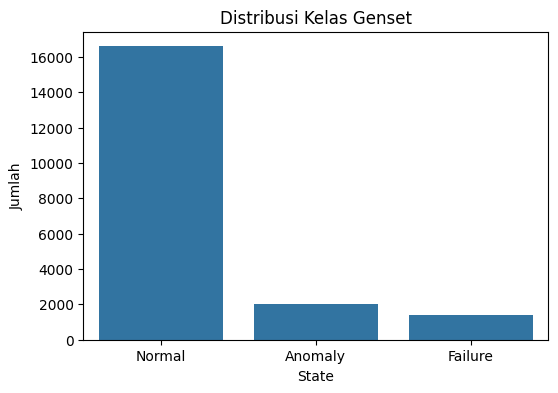

In [68]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['state'])
plt.title("Distribusi Kelas Genset")
plt.xlabel("State")
plt.ylabel("Jumlah")
plt.show()

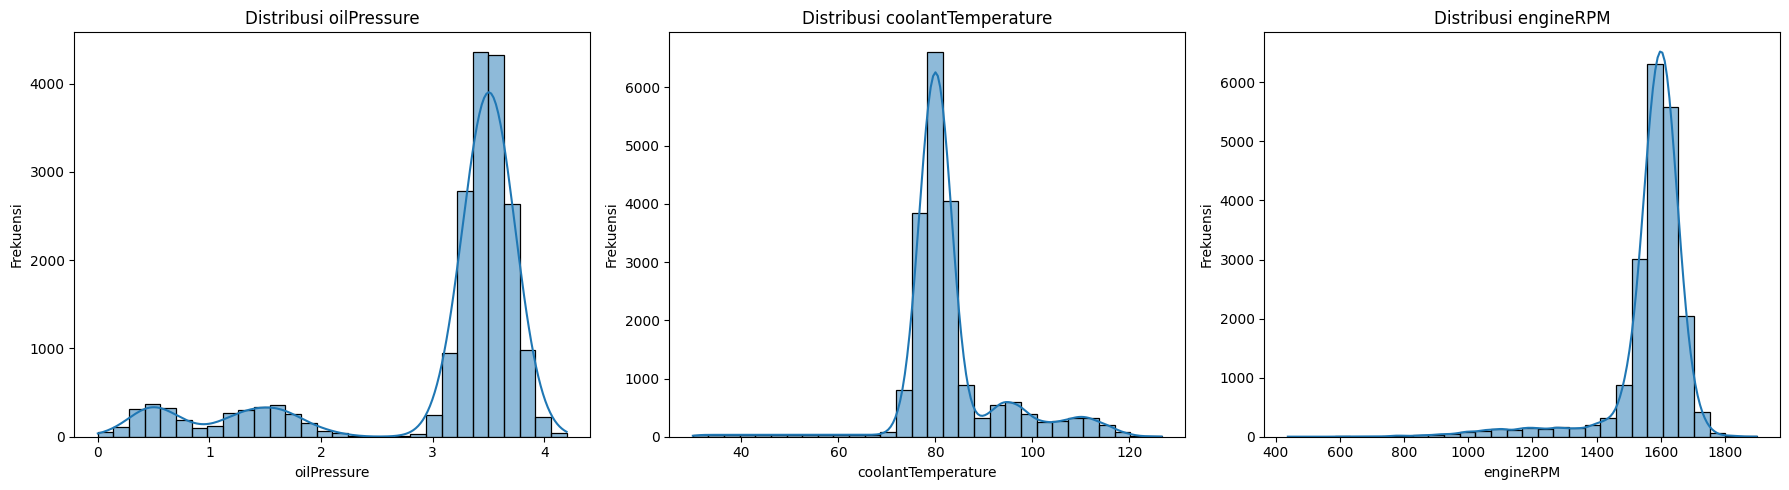

In [69]:
# Distribusi fitur numerik
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

feature_cols = ['oilPressure', 'coolantTemperature', 'engineRPM']

for i, col in enumerate(feature_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribusi {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frekuensi")

plt.tight_layout()
plt.show()

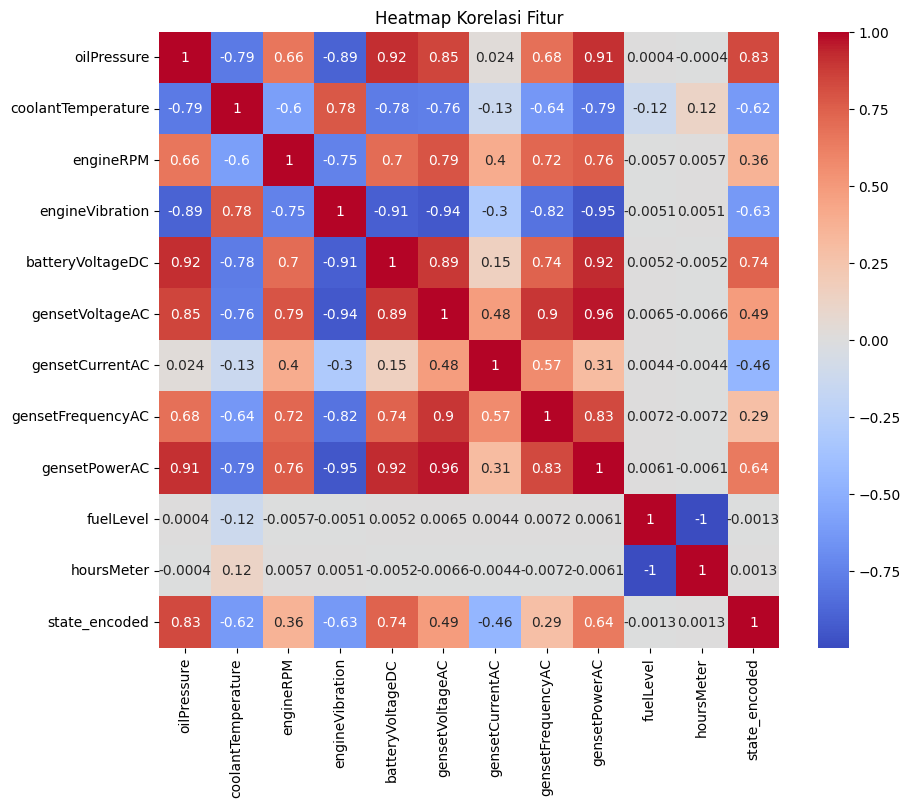

In [51]:
# Korelasi antar fitur
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(columns=['state', 'description']).corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Fitur")
plt.show()

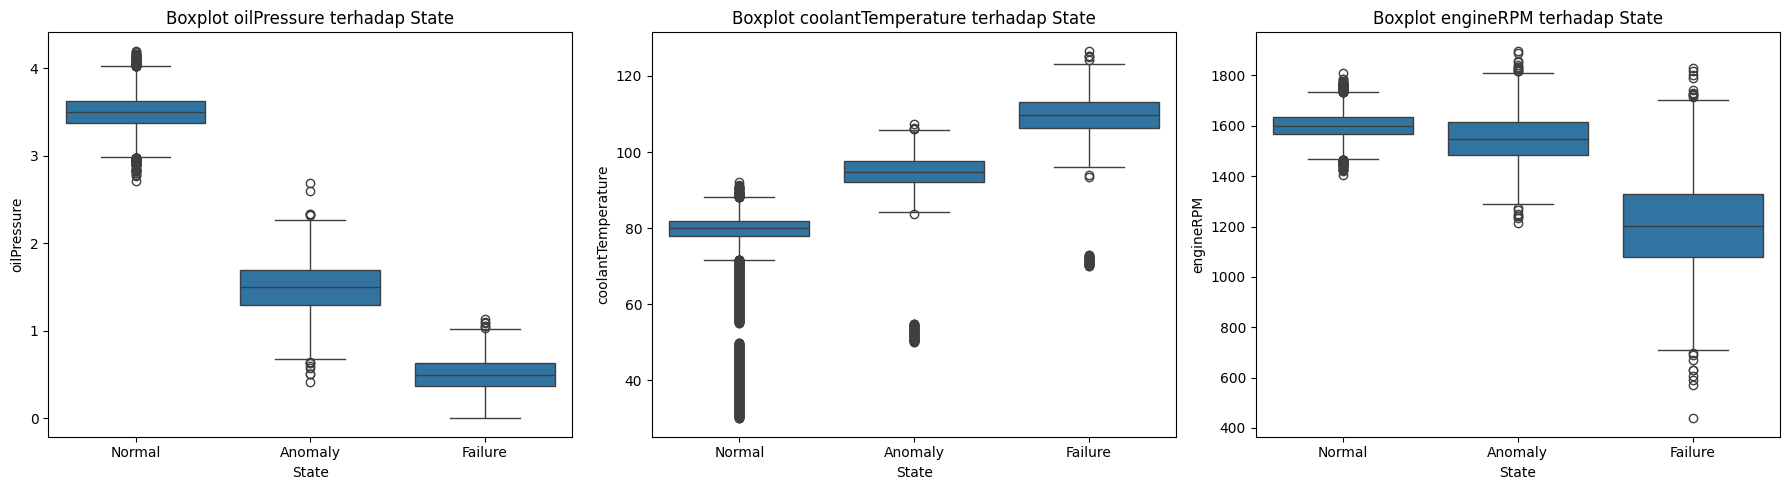

In [70]:
# Boxplot fitur terhadap target
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

feature_cols = ['oilPressure', 'coolantTemperature', 'engineRPM']

for i, col in enumerate(feature_cols):
    sns.boxplot(x=df['state'], y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot {col} terhadap State')
    axes[i].set_xlabel("State")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


### Splitting Data

In [56]:
# Drop kolom yang tidak digunakan
X = df.drop(columns=['state', 'description', 'state_encoded', 'fuelLevel', 'hoursMeter'])
y = df['state_encoded']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

## Modelling

In [57]:
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
model.fit(X_train_balanced, y_train_balanced)
y_pred = model.predict(X_test_scaled)


## Evaluasi Model


🔍 Classification Report:
              precision    recall  f1-score   support

     Anomaly       1.00      1.00      1.00       400
     Failure       1.00      1.00      1.00       280
      Normal       1.00      1.00      1.00      3320

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



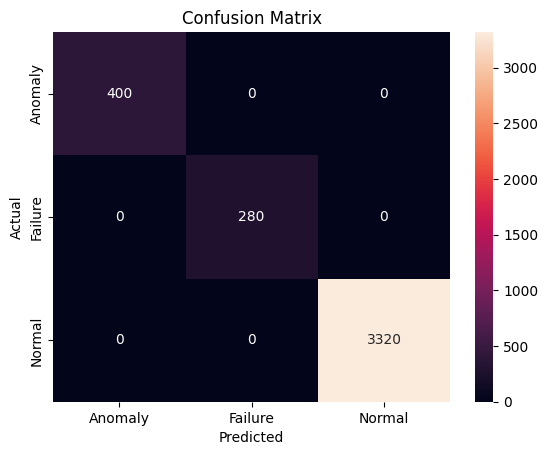

ROC AUC Score: 1.000


In [58]:
print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC AUC
try:
    y_proba = model.predict_proba(X_test_scaled)
    roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
    print(f"ROC AUC Score: {roc_auc:.3f}")
except:
    print("Model tidak mendukung predict_proba.")

In [62]:
# Top 5 reature importat
importances = model.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

top5 = feat_imp.head(5)
print("5 Feature Penting:")
print(top5)

5 Feature Penting:
oilPressure         0.258546
gensetVoltageAC     0.210046
gensetPowerAC       0.205726
gensetCurrentAC     0.136508
batteryVoltageDC    0.104781
dtype: float64


## Save Model

In [67]:
import joblib

joblib.dump(model, 'random_forest_genset.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le, 'label_encoder.pkl')

print("Model, Scaler, dan LabelEncoder berhasil disimpan.")

Model, Scaler, dan LabelEncoder berhasil disimpan.


## Prediksi

In [66]:
new_samples = pd.DataFrame([
    {
        'oilPressure': 2.4,
        'coolantTemperature': 60.0,
        'engineRPM': 1800,
        'engineVibration': 90,
        'batteryVoltageDC': 11.5,
        'gensetVoltageAC': 190,
        'gensetCurrentAC': 9.0,
        'gensetFrequencyAC': 48.0,
        'gensetPowerAC': 8000
    },
    {
        'oilPressure': 3.6,
        'coolantTemperature': 30.0,
        'engineRPM': 1550,
        'engineVibration': 45,
        'batteryVoltageDC': 13.0,
        'gensetVoltageAC': 230,
        'gensetCurrentAC': 16.0,
        'gensetFrequencyAC': 50.0,
        'gensetPowerAC': 12000
    },
    {
        'oilPressure': 0.5,
        'coolantTemperature': 95.0,
        'engineRPM': 700,
        'engineVibration': 120,
        'batteryVoltageDC': 9.8,
        'gensetVoltageAC': 160,
        'gensetCurrentAC': 3.0,
        'gensetFrequencyAC': 40.0,
        'gensetPowerAC': 2000
    }
])

new_samples_scaled = scaler.transform(new_samples)
predictions = model.predict(new_samples_scaled)
predicted_labels = le.inverse_transform(predictions)

for i, label in enumerate(predicted_labels):
    print(f"Data {i+1} diprediksi sebagai: {label}")


Data 1 diprediksi sebagai: Anomaly
Data 2 diprediksi sebagai: Normal
Data 3 diprediksi sebagai: Failure
